In [149]:
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [61]:
pd.set_option('display.max_rows', 10)

In [3]:
data = pd.read_csv('dataset/train.csv')

In [82]:
data.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [4]:
test = pd.read_csv('dataset/test.csv')

In [5]:
# Data contains numerical values, except for "galaxy" and 
# "galactic year", which represent name and ordinal relationship
print(data.dtypes.values)
print(test.dtypes.values)

[dtype('int64') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('

In [6]:
#Let's see how much data is missing for each feature
data.isna().mean().sort_values()

galactic year                                                                              0.000000
y                                                                                          0.000000
galaxy                                                                                     0.000000
existence expectancy index                                                                 0.000259
existence expectancy at birth                                                              0.000259
Gross income per capita                                                                    0.007245
Income Index                                                                               0.007245
Expected years of education (galactic years)                                               0.034411
Mean years of education (galactic years)                                                   0.093920
Intergalactic Development Index (IDI)                                                      0.101164


In [9]:
#Are there any new unknown galaxies in the test dataset?
#The answer is NO
a = set(data['galaxy'].unique())
b = set(test['galaxy'].unique())
b.issubset(a)

True

In [75]:
#Test dataset contains objects only of latest 10 years,
#including unmentioned in train data latest year 1016064
unique_years = data['galactic year'].unique()
print (unique_years)
print (unique_years.shape)

print(np.sort(test['galactic year'].unique()))
print(test['galactic year'].unique().shape)

[ 990025  991020  992016  993012  994009  995006  996004  997002  998001
  999000 1000000 1001000 1002001 1003002 1004004 1005006 1006009 1007012
 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056]
(26,)
[1007012 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056
 1016064]
(10,)


galactic year
990025     0.081928
991020     0.082005
992016     0.082007
993012     0.082011
994009     0.082023
995006     0.082027
996004     0.082088
997002     0.082100
998001     0.082106
999000     0.082111
1000000    0.082117
1001000    0.082297
1002001    0.082297
1003002    0.082300
1004004    0.082291
1005006    0.082288
1006009    0.082435
1007012    0.081335
1008016    0.081379
1009020    0.081381
1010025    0.081331
1011030    0.080062
1012036    0.094917
1013042    0.098005
1014049    0.087332
1015056    0.080857
Name: y, dtype: float64


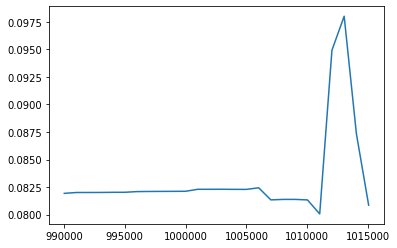

In [41]:

y_dist = data.groupby(['galactic year'])['y'].mean()
print (y_dist)
plt.plot(y_dist)

galaxy
Andromeda Galaxy (M31)                  0.043539
Andromeda I                             0.049126
Andromeda II                            0.176689
Andromeda III                           0.117387
Andromeda IX                            0.166813
                                          ...   
Ursa Major II Dwarf                     0.190628
Ursa Minor Dwarf                        0.051538
Virgo I                                 0.042337
Willman 1                               0.055283
Wolf-Lundmark-Melotte (WLM, DDO 221)    0.044738
Name: y, Length: 181, dtype: float64


(array([125.,  21.,   8.,  10.,   8.,   6.,   0.,   2.,   0.,   1.]),
 array([0.03693184, 0.07251439, 0.10809694, 0.14367949, 0.17926205,
        0.2148446 , 0.25042715, 0.2860097 , 0.32159225, 0.3571748 ,
        0.39275736]),
 <a list of 10 Patch objects>)

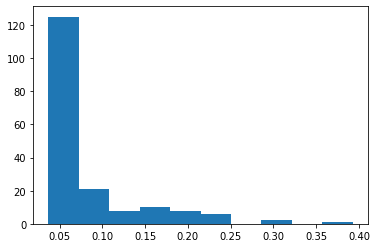

In [42]:
y_dist = data.groupby(['galaxy'])['y'].mean()
print(y_dist)
plt.hist(y_dist)

galaxy
Andromeda Galaxy (M31)                  0.043539
Andromeda I                             0.049126
Andromeda II                            0.176689
Andromeda III                           0.117387
Andromeda IX                            0.166813
                                          ...   
Ursa Major II Dwarf                     0.190628
Ursa Minor Dwarf                        0.051538
Virgo I                                 0.042337
Willman 1                               0.055283
Wolf-Lundmark-Melotte (WLM, DDO 221)    0.044738
Name: y, Length: 181, dtype: float64


(array([52., 45., 31., 12., 10.,  4., 14.,  9.,  2.,  2.]),
 array([-3.29868128, -3.06226948, -2.82585768, -2.58944588, -2.35303408,
        -2.11662228, -1.88021048, -1.64379868, -1.40738687, -1.17097507,
        -0.93456327]),
 <a list of 10 Patch objects>)

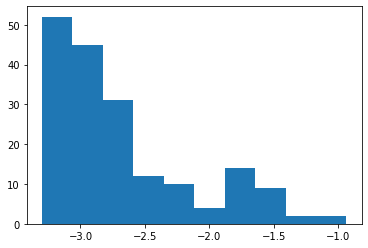

In [162]:
y_dist = data.groupby(['galaxy'])['y'].mean()
print(y_dist)
plt.hist(np.log(y_dist))

In [56]:
data.iloc[:, -1].describe()

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

In [58]:
(unique_years - 990025)/1001

array([ 0.        ,  0.99400599,  1.98901099,  2.98401598,  3.98001998,
        4.97602398,  5.97302697,  6.97002997,  7.96803197,  8.96603397,
        9.96503497, 10.96403596, 11.96403596, 12.96403596, 13.96503497,
       14.96603397, 15.96803197, 16.97002997, 17.97302697, 18.97602398,
       19.98001998, 20.98401598, 21.98901099, 22.99400599, 24.        ,
       25.00599401])

In [25]:
#With the exception of one galaxy NGC 5253 (drop it?), there at least 17 points for each galaxy - nice
print(data.groupby(['galaxy'])['galactic year'].count().sort_values())

galaxy
NGC 5253                                        1
Wolf-Lundmark-Melotte (WLM, DDO 221)           17
Andromeda XXI[57]                              17
Andromeda X                                    17
Aquarius Dwarf Galaxy (DDO 210)                17
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Pegasus Dwarf Irregular (DDO 216)              17
Perseus I (Andromeda XXXIII)                   18
Canes Venatici I Dwarf                         18
Cassiopeia Dwarf (Cas dSph, Andromeda VII)     18
Cassiopeia II (Andromeda XXX)                  18
Columba I                                      18
Fornax Dwarf (E356-G04)                        18
Hydra II                                       18
Lacerta I (Andromeda XXXI)                     18
Leo I Dwarf (DDO 74, UGC 5470)                 18
Barnard's Galaxy (NGC 6822)                    18
Leo T Dwarf                                    18
Leo V Dwarf                                    18
M110 (NGC 205)                             

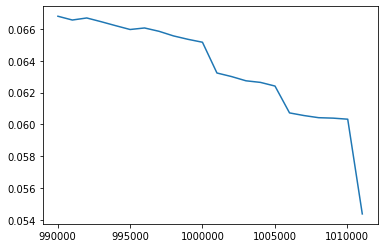

In [43]:
galslice = data[data['galaxy'] == 'Sextans B (UGC 5373)']
plt.plot(galslice['galactic year'], galslice['y'])

Let's try replacing all NaN in data with zeros. Furthermore in this part I assume that the target variable y does not depend on the galactic year nor the galaxy the data comes from. The assumption is that the final index is calculated solely based on the statistics of a given galaxy in a given year. In other words, I believe here that y is non-discriminative towards what galaxy and which year data is drawn from. 

In [187]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.linear_model import LinearRegression as LR

X = data.fillna(value=0).iloc[:, 2:-1].values
y = data.fillna(value=0).iloc[:, -1].values

#shortcut for scorer
nrmse = 'neg_root_mean_squared_error'
#normalize
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

(X_train, X_test, y_train,
 y_test) = model_selection.train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=425)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

train_rmse = -CVS(lr, X_train, y_train, scoring = nrmse, cv = 5).mean()
test_rmse = -CVS(lr, X_test, y_test, scoring = nrmse, cv = 5).mean()
print(train_rmse, 'Linreg on train data')
print(test_rmse, 'Linreg on test data\n')

SGDreg = linear_model.SGDRegressor(penalty='l1')
SGDreg.fit(X_train, y_train)

train_rmse = -CVS(SGDreg, X_train, y_train, scoring = nrmse, cv = 5).mean()
test_rmse = -CVS(SGDreg, X_test, y_test, scoring = nrmse, cv = 5).mean()
print(train_rmse, 'SGDreg on train data')
print(test_rmse, 'SGDreg on test data')



0.039715770090714135 Linreg on train data
0.04619005493173697 Linreg on test data

0.04120393053488227 SGDreg on train data
0.0450457683825086 SGDreg on test data


In [183]:
# Tuning hyperparameters of an SGD regressor
param_grid = {
    'loss': ['huber', 'squared_loss', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 0.00001, 0.000001],
    'epsilon': [0.1, 0.01, 0.001, 0.3, 0.5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}
SGDreg_GSCV = model_selection.GridSearchCV(SGDreg, param_grid=param_grid, n_jobs=3, scoring='neg_root_mean_squared_error')
SGDreg_GSCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l1',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_s...
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1e-05, 1e-06],
                         'epsilon': [0.1, 0.01, 0.001, 0.3, 0.5],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
        

In [184]:
SGDreg_GSCV.best_params_

{'alpha': 0.01,
 'epsilon': 0.3,
 'learning_rate': 'adaptive',
 'loss': 'huber',
 'penalty': 'l2'}

In [203]:
# test_rmse of SGDregressor with best parameters based on GridSearch
metrics.mean_squared_error(y_test, SGDreg_GSCV.best_estimator_.predict(X_test))**0.5

0.04169575155088787

In [132]:
X_train[:, 1]

array([82.07633263, 74.47090212, 67.06210213, ..., 68.35158793,
       90.71095242, 54.55316052])

In [91]:
X_train

array([[1.00302983e+00, 8.20763326e+01, 3.66147483e+04, ...,
        4.79470827e+00, 1.97307699e+01, 8.24575359e-01],
       [8.83323902e-01, 7.44709021e+01, 1.91584530e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.05476429e-01, 6.70621021e+01, 2.60712034e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.61967185e-01, 6.83515879e+01, 2.89941384e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.73456845e-01, 9.07109524e+01, 3.98473684e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.26269365e-01, 5.45531605e+01, 3.12991695e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
linreg = linear_model.LinearRegression()